<h1>Vidhi Agrawal - Data Analysis and Visualization</h1>


<ol>
<li>Read NYC Free Public WiFi data
<li>Calculate age of Wi-Fi hotspots and save in a new column "age"
<li>Analyze age distribution across boroughs
<li>Analyze type of Wi-Fi hotspots across boroughs
<li>Analyze boroughs, NTAs and SSID of Wi-Fi hotspots
<li>Read NTA demographic data
<li>Determine if the Wi-Fi hotspots are placed in locations such that they serve the public adequately

<h2>Installing and importing necessary libraries</h2>

In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime
from folium.plugins import HeatMap
plt.style.use('seaborn')
%matplotlib inline


/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_23918/3791187129.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<h2>Read the data</h2>
<li>Import NYC Free Public WiFi dataset

In [2]:
df = pd.read_csv('NYC_Wi-Fi_Hotspot_Locations.csv')


<h2>Add a column for age of public WiFi locations</h2>
<li>Use Oct 1, 2023 as the current date
<li>Datetime column may consist of timezones so make sure to correctly deal with that too
<li>Calculate age as a float number of months. Use only the month part of the date to calculate the age. For example, if the activated date is Aug 31, 2023 then the age is 2 months. Make sure to account for missing or invalid dates. Age for missing or invalid dates should be nan
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [3]:
#Strip date in datetime format, replace invalid formats with NaT(invalid date format)
df['Activated'] = pd.to_datetime(df['Activated'], format='%m/%d/%Y', errors='coerce')

#Calculate Age column in months from 10th October 2023 to every Activated date in the dataset
df['Age']= (datetime.date(2023, 10, 1)-df['Activated'].dt.date).dt.days / 30.44


In [4]:
pd.options.display.max_columns = None
df


,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,Location_T,Remarks,City,SSID,SourceID,Activated,BoroCode,Borough Name,Neighborhood Tabulation Area Code (NTACODE),Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)",Age
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.892077,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,NaT,4,Queens,QN02,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)",NaN
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.217755,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,NaT,4,Queens,QN22,Flushing,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)",NaN
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.908840,Subway Station,SN 123,Brooklyn,TransitWirelessWiFi,NaN,NaT,3,Brooklyn,BK90,East Williamsburg,34,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)",NaN
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.680416,Outdoor,NaN,Brooklyn,Downtown Brooklyn WiFi,NaN,NaT,3,Brooklyn,BK09,Brooklyn Heights-Cobble Hill,33,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)",NaN
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.888161,Subway Station,SN 223,New York,TransitWirelessWiFi,NaN,NaT,1,Manhattan,MN40,Upper East Side-Carnegie Hill,4,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,10872,3,Limited Free,SPECTRUM,Carroll Park,Court off Smith St between Carrol St and 1st P...,40.680630,-73.995382,9.855309e+05,187248.314202,Outdoor TWC Aerial,3 free 10 min sessions,Brooklyn,GuestWiFi,0,NaT,3,Brooklyn,BK33,Carroll Gardens-Columbia Street-Red Hook,39,11231,306,77,77,3007547,3004490015,1338,"(40.6806299998, -73.9953819995)",NaN
3315,12026,2,Free,LinkNYC - Citybridge,bx-01-138789,312 WILLIS AVENUE,40.810896,-73.921434,1.005999e+06,234718.294065,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Bronx,LinkNYC Free Wi-Fi,LINK-012132,2018-04-20,2,Bronx,BX39,Mott Haven-Port Morris,8,10454,201,39,39,2000335,2022850010,4113,"(40.8108964904, -73.9214341701)",65.374507
3316,12063,3,Free,LinkNYC - Citybridge,bk-01-143982,32 GRAHAM AVENUE,40.701930,-73.942239,1.000265e+06,195013.901033,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-000004,2017-08-02,3,Brooklyn,BK90,East Williamsburg,34,11206,301,491,491,3071609,3031200000,3018,"(40.7019303441, -73.9422392381)",73.948752
3317,12066,3,Free,LinkNYC - Citybridge,bk-17-126527,1339 FLATBUSH AVENUE,40.638560,-73.953603,9.971268e+05,171924.271359,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-000022,2018-05-11,3,Brooklyn,BK95,Erasmus,45,11226,317,790,790,3120360,3052110060,3021,"(40.6385596088, -73.9536032378)",64.684625


<li>Find the percentage of missing age values

In [5]:
# Your code here

#Missing percentage of age values
(df['Age'].isnull().sum()/len(df))*100


45.10394697197951

45.1% values of Age are missing

<h2>Plot age distribution of Brooklyn and Bronx</h2>
<li>Find out which borough has gotten free Wi-Fi only recently

72.14944970472594 73.18501395589745
55.02628120893561 61.235216819973715


Text(0.5, 1.0, 'Age Distrubition across Brooklyn and Bronx')

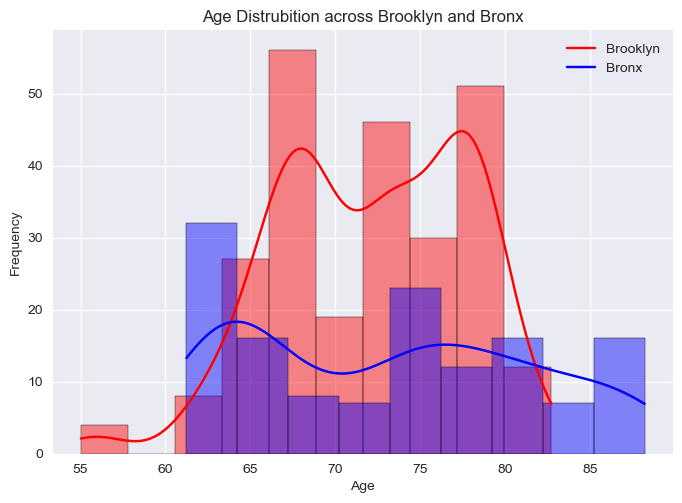

In [6]:
# Your code here

df_brook=df[df['Borough Name']=='Brooklyn']
df_bronx=df[df['Borough Name']=='Bronx']
print(df_brook['Age'].mean(),df_bronx['Age'].mean())
print(df_brook['Age'].min(),df_bronx['Age'].min())
#Plot of Age Distribution vs Borough
sns.histplot(df[df['Borough Name']=='Brooklyn']['Age'], alpha=0.45, color='red',kde=True) 
sns.histplot(df[df['Borough Name']=='Bronx']['Age'], alpha=0.45, color='blue',kde=True) 
plt.legend(['Brooklyn', 'Bronx']) 
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distrubition across Brooklyn and Bronx")


Brooklyn seems to have gotten free wifi more recently as the graph also shows a few latest additions to Brooklyn. Plus, the mean age for Brooklyn is also slightly lower than Bronx. Additionally the kde plot also shows higher concentration of brooklyn for lower ages. The latest addition to brooklyn is at 55 months and at Bronx is at 61 months.


<h2>Plot the scatter plot between borough and age</h2>

Text(0.5, 1.0, 'Scatter plot of Borough vs Age')

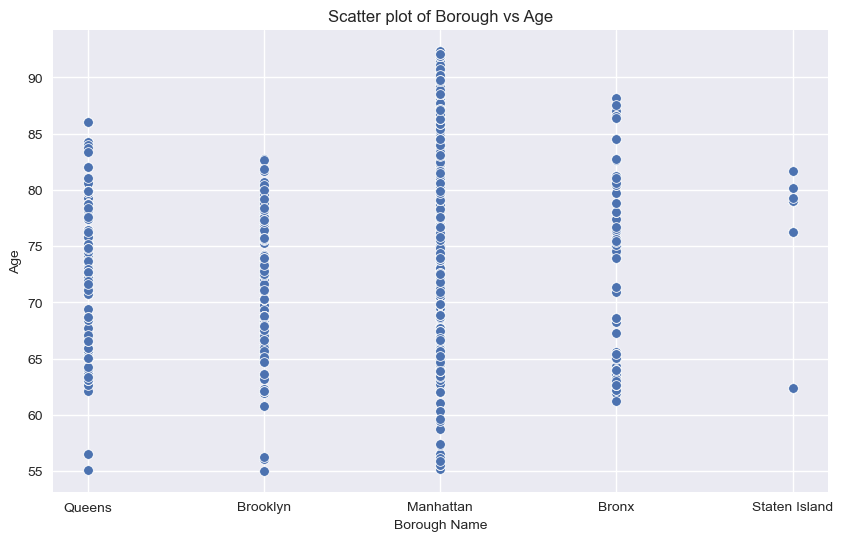

In [7]:
# Create a scatter plot between Borough Name and Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Borough Name', y="Age", data=df)
plt.xlabel("Borough Name")
plt.ylabel("Age")
plt.title("Scatter plot of Borough vs Age")


<h2>Plot a bar graph that groups the data by borough and then by type (free, limited free, partner site)</h2>
The result should be a single plot with borough on the x-axis and number of free Wi-Fi hotspots on the y-axis. Different colors are used to distinguish different types in the legend.
<li>Do you notice any differences?</li>

Text(0, 0.5, 'Number of WiFi Hotspots')

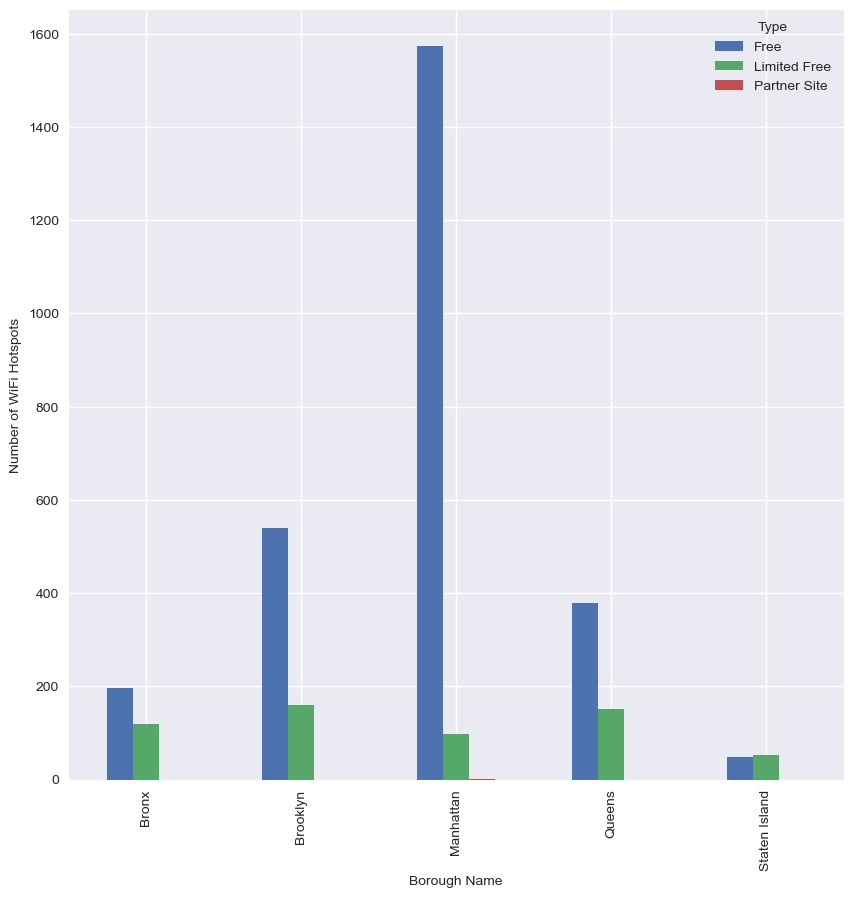

In [8]:
# Your code here
df_group=df.groupby(['Borough Name','Type'])
df_group.size().unstack().plot(kind='bar',figsize=(10,10)).set_ylabel('Number of WiFi Hotspots')



Yes,there are differences:
1. Bronx, Brooklyn, Manhattan, Queens are significantly 'Free' dominated as opposed to Staten Island where Free and Limited free are almost at par
2. Manhattan is a very high user of Free type as compared to others
3. Partner Site types are extremely low in usage as compared to the other two types

<h2>Calculate the following</h2>
<li>NTA with the highest number of Wi-Fi hotspots (alphabetically ascending for tie-breaking)
<li>NTA with the lowest number of Wi-Fi hotspots (alphabetically descending for tie-breaking)

In [9]:
# Your code here

#Groupby NTA and sort to get the NTA with the highest number of wifi hotspots(alphabetically ascending for tie-breaking)
df_NTA=pd.DataFrame((df.groupby('Neighborhood Tabulation Area (NTA)').size()).reset_index(), columns=['Neighborhood Tabulation Area (NTA)',0]).rename(columns={0:'No. of Hotspot Users'})
df_NTA.sort_values(by=['No. of Hotspot Users','Neighborhood Tabulation Area (NTA)'], ascending=[False,True])

,Neighborhood Tabulation Area (NTA),No. of Hotspot Users
100,Midtown-Midtown South,160
78,Hudson Yards-Chelsea-Flatiron-Union Square,156
156,Upper West Side,143
38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,125
153,Turtle Bay-East Midtown,111
...,...,...
149,Steinway,1
162,West Farms-Bronx River,1
165,Westchester-Unionport,1
167,Whitestone,1


In [10]:
df_NTA.sort_values(by=['No. of Hotspot Users','Neighborhood Tabulation Area (NTA)'], ascending=[False,True])[:1]

,Neighborhood Tabulation Area (NTA),No. of Hotspot Users
100,Midtown-Midtown South,160


Midtown-Midtown South is the NTA with the highest number of hotspot users

In [11]:
#Groupby NTA and sort to get the NTA with the lowest number of wifi hotspots(alphabetically descending for tie-breaking)
df_NTA.sort_values(by=['No. of Hotspot Users','Neighborhood Tabulation Area (NTA)'], ascending=[True,False])

,Neighborhood Tabulation Area (NTA),No. of Hotspot Users
169,Williamsburg,1
167,Whitestone,1
165,Westchester-Unionport,1
162,West Farms-Bronx River,1
149,Steinway,1
...,...,...
153,Turtle Bay-East Midtown,111
38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,125
156,Upper West Side,143
78,Hudson Yards-Chelsea-Flatiron-Union Square,156


In [12]:
df_NTA.sort_values(by=['No. of Hotspot Users','Neighborhood Tabulation Area (NTA)'], ascending=[True,False])[:1]

,Neighborhood Tabulation Area (NTA),No. of Hotspot Users
169,Williamsburg,1


Williamsburg is the NTA with the lowest number of hotspot users

<h2>Top 5 neighborhoods in each borough</h2>
<li>Group data by the borough and the NTA
<li>Draw a figure of 5 plots that show the top 5 NTAs in each borough by number of Wi-Fi hotspots


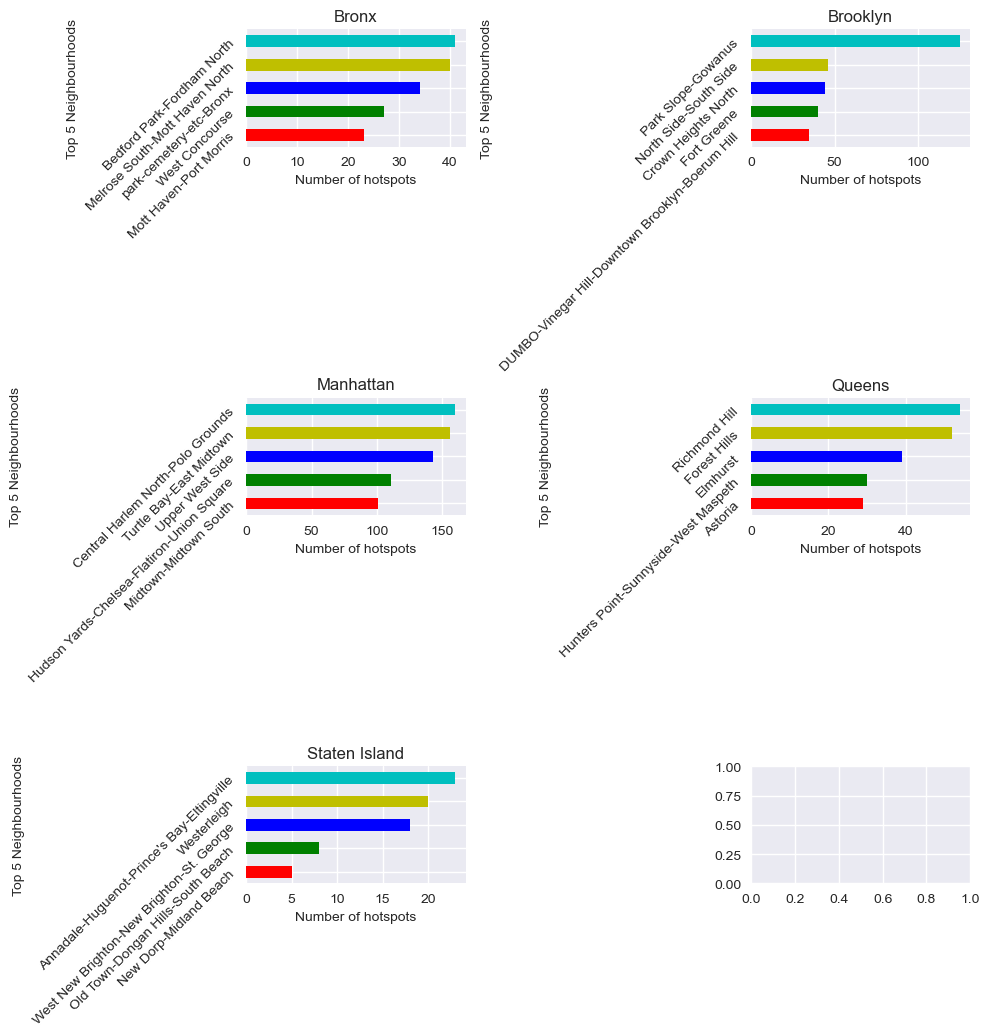

In [13]:
# Your code here

#Groupby NTA and Borough Name
df_borough=df.groupby(['Neighborhood Tabulation Area (NTA)','Borough Name']).size().unstack()

#Plot to get the top 5 NTA's in each borough
%matplotlib inline
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(10,10))

colors = ['r','g','b','y','c']
for i, (borough, NTA_value) in enumerate(df_borough.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    NTA_value = NTA_value.sort_values(ascending=False)[:5] 
    reversed_NTA_values =  NTA_value[::-1]
    reversed_NTA_values.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(borough)
    ax.set_yticklabels(NTA_value.index, rotation=45)
    ax.set_xlabel('Number of hotspots')
    ax.set_ylabel('Top 5 Neighbourhoods')  
    
plt.tight_layout() 



<h2>Popular SSIDs in each borough</h2>
<li>Group data by the SSID and the borough
<li>Draw a figure of 5 plots that show the number of Wi-Fi hotspots by SSID in descending order

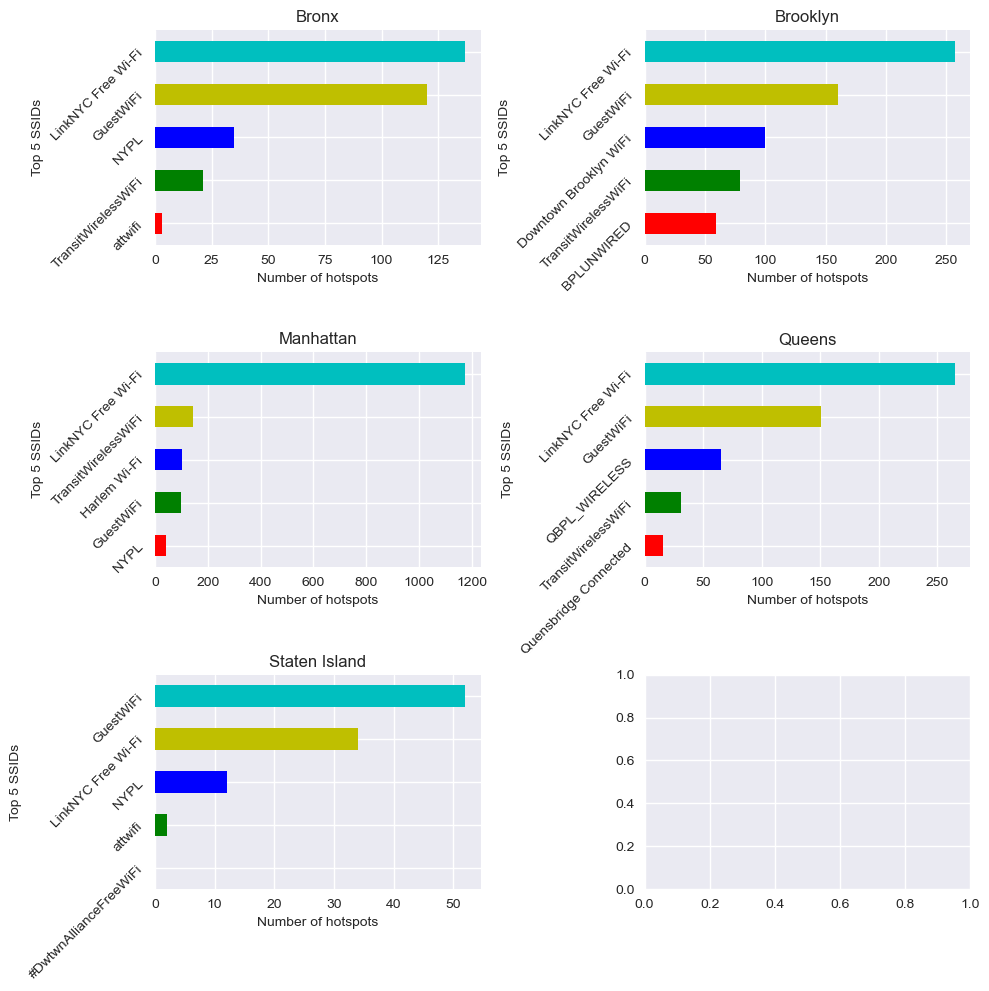

In [14]:
#Groupby SSID and Borough Name
df_SSID=df.groupby(['SSID','Borough Name']).size().unstack()

#Plot to get the top 5 wifi hotspots used in each borough
%matplotlib inline
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(10,10))

colors = ['r','g','b','y','c']
for i, (borough, SSIDs) in enumerate(df_SSID.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    SSIDs = SSIDs.sort_values(ascending=False)[:5] 
    reversed_SSIDs = SSIDs[::-1]
    reversed_SSIDs.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(borough)
    ax.set_yticklabels(reversed_SSIDs.index, rotation=45)
    ax.set_xlabel('Number of hotspots')
    ax.set_ylabel('Top 5 SSIDs') 
    
plt.tight_layout() 


<h1>Are Wi-Fi hotspots located such that everyone has adequate access?</h1>
<li>Group data by NTA and count the total number of hotspots per NTA in a column named 'total_hotspots'. Save this df as per_capita_df
<li>Import Population_by_NTA.csv and join with the per_capita_df using NTA Code to get population

In [15]:
# Your code here

#Create per_capita_df by calculating total_hotspots by grouping on NTA_code
per_capita_df=df.groupby('Neighborhood Tabulation Area Code (NTACODE)').size().reset_index().rename(columns={0:'total_hotspots'})
per_capita_df.sort_values(by='total_hotspots', ascending=False)

,Neighborhood Tabulation Area Code (NTACODE),total_hotspots
89,MN17,160
86,MN13,156
85,MN12,143
14,BK38,125
90,MN19,111
...,...,...
18,BK43,1
150,QN56,1
151,QN57,1
19,BK44,1


In [16]:
# Your code here

#Read the population data
pop_by_NTA=pd.read_csv('New_York_City_Population_By_Neighborhood_Tabulation_Areas_20231016.csv')

#Filter data for only 2010
pop_by_NTA=pop_by_NTA[pop_by_NTA['Year']==2010]
pop_by_NTA.head()


,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538


In [17]:
#Join the per_capita_df with the population data on NTA_code
per_capita_df=pop_by_NTA.merge(per_capita_df, left_on='NTA Code', right_on='Neighborhood Tabulation Area Code (NTACODE)', how='inner').drop(columns=['Neighborhood Tabulation Area Code (NTACODE)'])

In [18]:
per_capita_df



,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,total_hotspots
0,Bronx,2010,5,BX01,Claremont-Bathgate,31078,4
1,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517,9
2,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415,23
3,Bronx,2010,5,BX06,Belmont,27378,1
4,Bronx,2010,5,BX07,Bronxdale,35538,1
...,...,...,...,...,...,...,...
173,Staten Island,2010,85,SI35,New Brighton-Silver Lake,17525,1
174,Staten Island,2010,85,SI36,Old Town-Dongan Hills-South Beach,24835,20
175,Staten Island,2010,85,SI37,Stapleton-Rosebank,26453,5
176,Staten Island,2010,85,SI45,New Dorp-Midland Beach,21896,23


<li>Create a persons_per_hotspot column in per_capita_df which is population/total_hotspots

In [19]:
# Your code here

#Create a calculated column persons_per_hotspot
per_capita_df['persons_per_hotspot']=per_capita_df['Population']/per_capita_df['total_hotspots']
per_capita_df.sort_values(by='persons_per_hotspot', ascending=False)



,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,total_hotspots,persons_per_hotspot
124,Queens,2010,81,QN25,Corona,57658,1,57658.000000
77,Brooklyn,2010,47,BK96,Rugby-Remsen Village,55326,1,55326.000000
52,Brooklyn,2010,47,BK43,Midwood,52835,1,52835.000000
132,Queens,2010,81,QN34,Queens Village,52504,1,52504.000000
160,Queens,2010,81,QN72,Steinway,47534,1,47534.000000
...,...,...,...,...,...,...,...,...
90,Manhattan,2010,61,MN17,Midtown-Midtown South,28630,160,178.937500
33,Bronx,2010,5,BX99,park-cemetery-etc-Bronx,1906,34,56.058824
107,Manhattan,2010,61,MN99,park-cemetery-etc-Manhattan,1849,44,42.022727
162,Queens,2010,81,QN99,park-cemetery-etc-Queens,436,12,36.333333


<li>Join persons_per_hotspot to the original dataframe on NTA Code

In [20]:
# Your code here

#Join per_capita_df with the original df on NTA code to get the polulation stats with the original df
df_persons_per_hotspot=df.merge(per_capita_df, left_on='Neighborhood Tabulation Area Code (NTACODE)', right_on='NTA Code',
                                how='inner')



In [21]:
df_persons_per_hotspot

,OBJECTID,Borough_x,Type,Provider,Name,Location,Latitude,Longitude,X,Y,Location_T,Remarks,City,SSID,SourceID,Activated,BoroCode,Borough Name,Neighborhood Tabulation Area Code (NTACODE),Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)",Age,Borough_y,Year,FIPS County Code,NTA Code,NTA Name,Population,total_hotspots,persons_per_hotspot
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.892077,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,NaT,4,Queens,QN02,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)",NaN,Queens,2010,81,QN02,Springfield Gardens North,25409,5,5081.8
1,10601,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.672680,-73.786780,1.043396e+06,184423.851018,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,NaT,4,Queens,QN02,Springfield Gardens North,28,11434,412,294,294,0,0,1405,"(40.6726799999, -73.7867800003)",NaN,Queens,2010,81,QN02,Springfield Gardens North,25409,5,5081.8
2,10602,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.673180,-73.785170,1.043842e+06,184607.105901,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,NaT,4,Queens,QN02,Springfield Gardens North,28,11434,412,294,294,0,0,1406,"(40.6731799999, -73.7851700005)",NaN,Queens,2010,81,QN02,Springfield Gardens North,25409,5,5081.8
3,10050,4,Free,QPL,Rochdale Village,169-09 137 AVENUE,40.672875,-73.770590,1.047887e+06,184506.315749,Library,NaN,Jamaica,QBPL_WIRELESS,NaN,NaT,4,Queens,QN02,Springfield Gardens North,28,11434,412,33402,33402,4270057,4124950175,472,"(40.6728752044, -73.7705902161)",NaN,Queens,2010,81,QN02,Springfield Gardens North,25409,5,5081.8
4,10603,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.676090,-73.782540,1.044569e+06,185669.098856,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,NaT,4,Queens,QN02,Springfield Gardens North,28,11434,412,294,294,0,0,1407,"(40.6760899996, -73.7825399998)",NaN,Queens,2010,81,QN02,Springfield Gardens North,25409,5,5081.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,9939,2,Free,NYPL,Parkchester,1985 WESTCHESTER AVENUE,40.833736,-73.858355,1.023447e+06,243061.601853,Library,NaN,Bronx,NYPL,NaN,NaT,2,Bronx,BX46,Parkchester,18,10462,209,222,222,2028890,2039300059,352,"(40.8337362974, -73.8583552177)",NaN,Bronx,2010,5,BX46,Parkchester,29821,1,29821.0
3315,10028,4,Free,QPL,Hollis,202-05 HILLSIDE AVENUE,40.720168,-73.762304,1.050138e+06,201742.701879,Library,NaN,Hollis,QBPL_WIRELESS,NaN,NaT,4,Queens,QN06,Jamaica Estates-Holliswood,23,11423,408,478,478,4224387,4105320120,446,"(40.7201684296, -73.7623041123)",NaN,Queens,2010,81,QN06,Jamaica Estates-Holliswood,25480,1,25480.0
3316,10089,4,Free,QPL,Bayside,214-20 NORTHERN BOULEVARD,40.760126,-73.768362,1.048421e+06,216295.809912,Library,NaN,Bayside,QBPL_WIRELESS,NaN,NaT,4,Queens,QN46,Bayside-Bayside Hills,19,11361,411,1471,1471,4157389,4073330215,515,"(40.7601255812, -73.7683619807)",NaN,Queens,2010,81,QN46,Bayside-Bayside Hills,43808,1,43808.0
3317,10013,4,Free,QPL,Maspeth,69-70 GRAND AVENUE,40.726995,-73.893105,1.013878e+06,204158.650131,Library,NaN,Maspeth,QBPL_WIRELESS,NaN,NaT,4,Queens,QN30,Maspeth,30,11378,405,49302,49302,4308052,4027960008,430,"(40.7269953701, -73.8931045649)",NaN,Queens,2010,81,QN30,Maspeth,30516,1,30516.0


<h2>Mapping</h2>
<li>Draw a folium heatmap using estimated number of people using each Wi-Fi hotspot

In [22]:
# Your code here

#Create a heatmap using Folium
import folium
from folium.plugins import HeatMap

#This is the set centre
m = folium.Map(location=[40.674860, -73.784120], zoom_start=15)

#m.choropleth(fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,legend_name='Distribution of Number of people using each wifi hotspot')

#Fetch records for each latitude, longitude and persons_per_hotspot from df_persons_per_hotspot
data = df_persons_per_hotspot[['Latitude', 'Longitude', 'persons_per_hotspot']].values.tolist()



In [23]:
HeatMap(data).add_to(m)
m